# Análise Homicídios Dolosos no estado de São Paulo - Janeiro a Abril de 2019

*Dados da Secretaria de Segurança Pública de São Paulo (SSP-SP)*

*Disponível em: http://www.ssp.sp.gov.br/transparenciassp/. Acesso em: 19/06/2019*

In [68]:
import pandas as pd
import seaborn as sns
from datetime import datetime

In [11]:
# Dataframes de cada mês, carregados via arquivo .xlsx (Excel)
janeiro = pd.read_excel('DadosBO_2019_1.xlsx')
fevereiro = pd.read_excel('DadosBO_2019_2.xlsx')
marco = pd.read_excel('DadosBO_2019_3.xlsx')
abril = pd.read_excel('DadosBO_2019_4.xlsx')

In [106]:
# Concatenando os dataframes e filtrando pelo ano de 2019 e apenas homicídios consumados
# O dataset contém alguns dados apontando para anos anteriores
dados = pd.concat([janeiro, fevereiro, marco, abril])
dados = dados.query("DATAOCORRENCIA.str.contains('2019') and STATUS == 'Consumado'")
dados['TIMESTAMP'] = dados['DATAOCORRENCIA'].apply(lambda x : datetime.strptime(x, '%d/%m/%Y'))

In [103]:
# Cinco primeiro resultados
dados.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,TIMESTAMP
10,2019,5,5/2019,01/01/2019 02:37:38,01/01/2019 03:29:28,01/01/2019,DE MADRUGADA,01/01/2019,01/01/2019 02:37:38,Desconhecida,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,2019-01-01
11,2019,2,2/2019,01/01/2019 02:58:41,01/01/2019 04:17:02,01/01/2019,DE MADRUGADA,01/01/2019,01/01/2019 02:58:41,Desconhecida,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,2019-01-01
17,2019,2,2/2019,01/01/2019 04:13:40,01/01/2019 04:56:39,01/01/2019,DE MADRUGADA,01/01/2019,01/01/2019 04:13:40,Conhecida,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,2019-01-01
19,2019,7,7/2019,01/01/2019 06:12:14,01/01/2019 06:25:57,01/01/2019,DE MADRUGADA,01/01/2019,01/01/2019 06:12:14,Desconhecida,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,2019-01-01
21,2019,8,8/2019,01/01/2019 05:27:42,01/01/2019 06:30:59,01/01/2019,DE MADRUGADA,01/01/2019,01/01/2019 05:27:42,Desconhecida,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,2019-01-01


In [50]:
# Colunas e seus tipos
dados.dtypes

ANO_BO                               int64
NUM_BO                               int64
NUMERO_BOLETIM                      object
BO_INICIADO                         object
BO_EMITIDO                          object
DATAOCORRENCIA                      object
PERIDOOCORRENCIA                    object
DATACOMUNICACAO                     object
DATAELABORACAO                      object
BO_AUTORIA                          object
FLAGRANTE                           object
NUMERO_BOLETIM_PRINCIPAL            object
LOGRADOURO                          object
NUMERO                             float64
BAIRRO                              object
CIDADE                              object
UF                                  object
LATITUDE                            object
LONGITUDE                           object
DESCRICAOLOCAL                      object
EXAME                               object
SOLUCAO                             object
DELEGACIA_NOME                      object
DELEGACIA_C

## Homicídios registrados por dia

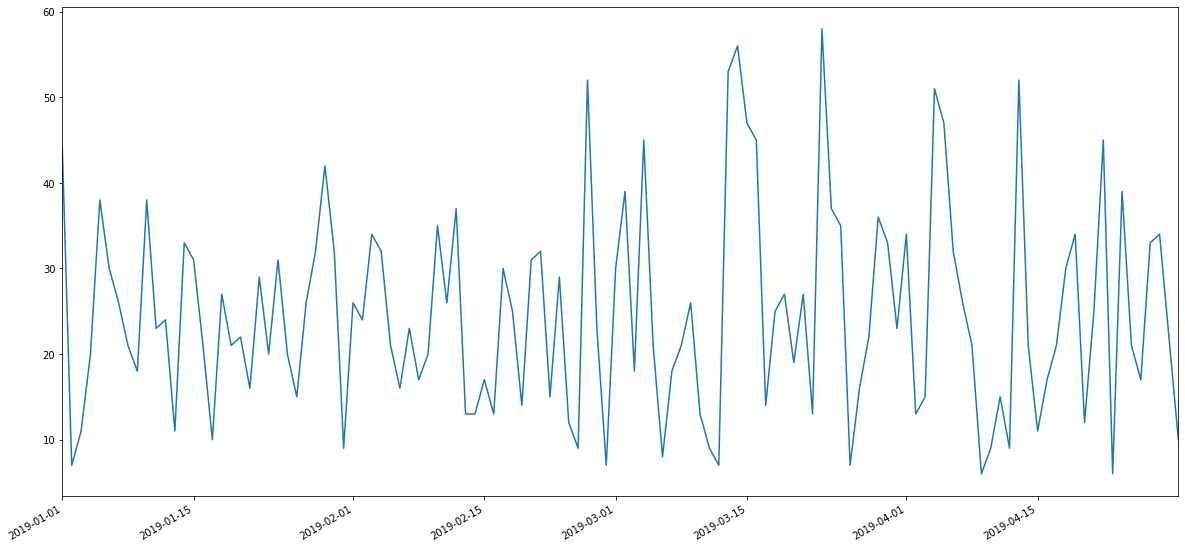

In [107]:
dados['TIMESTAMP'].value_counts().sort_values(ascending = False).plot.line(figsize=(20,10))

## Número de ocorrências por período do dia

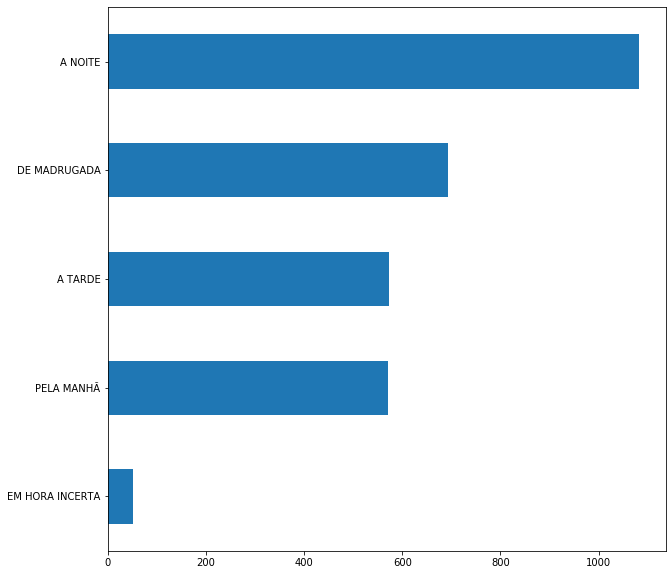

In [108]:
dados['PERIDOOCORRENCIA'].value_counts().sort_values(ascending = True).plot(kind='barh', figsize=(10,10))

## Cidades com maior número de ocorrências

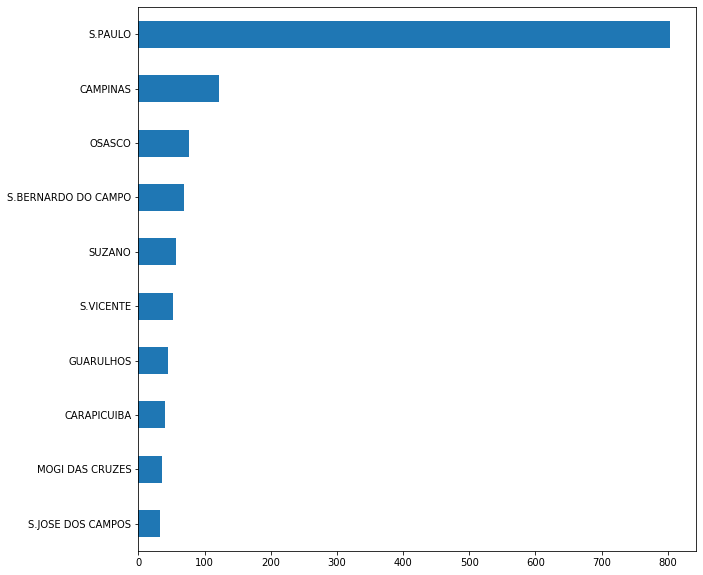

In [109]:
dados['CIDADE'].value_counts().head(10).sort_values().plot(kind='barh', figsize=(10,10))

## Número de homicídios por faixa etária

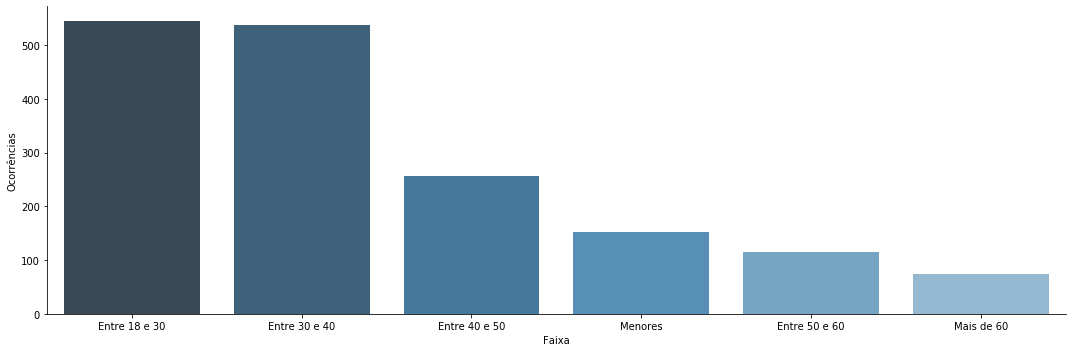

In [114]:
menores = dados.query('IDADE < 18').shape[0]
faixa_18_25 = dados.query('IDADE >= 18 and IDADE <= 25').shape[0]
faixa_25_30 = dados.query('IDADE > 25 and IDADE <= 30').shape[0]
faixa_30_40 = dados.query('IDADE > 30 and IDADE <= 40').shape[0]
faixa_40_50 = dados.query('IDADE > 40 and IDADE <= 50').shape[0]
faixa_50_60 = dados.query('IDADE > 50 and IDADE <= 60').shape[0]
mais_que_60 = dados.query('IDADE > 60').shape[0]

faixa_etaria = {
    "Faixa": ["Menores", "Entre 18 e 30", 'Entre 30 e 40', 'Entre 40 e 50', 'Entre 50 e 60', "Mais de 60"],
    "Ocorrências": [menores, faixa_18_25, faixa_30_40, faixa_40_50, faixa_50_60, mais_que_60]
}

faixa_etaria = pd.DataFrame(faixa_etaria).sort_values(by = "Ocorrências", ascending = False)

sns.catplot(x = "Faixa", y = "Ocorrências", kind="bar", data = faixa_etaria, palette="Blues_d", aspect=3)

## Número de homicídios por gênero

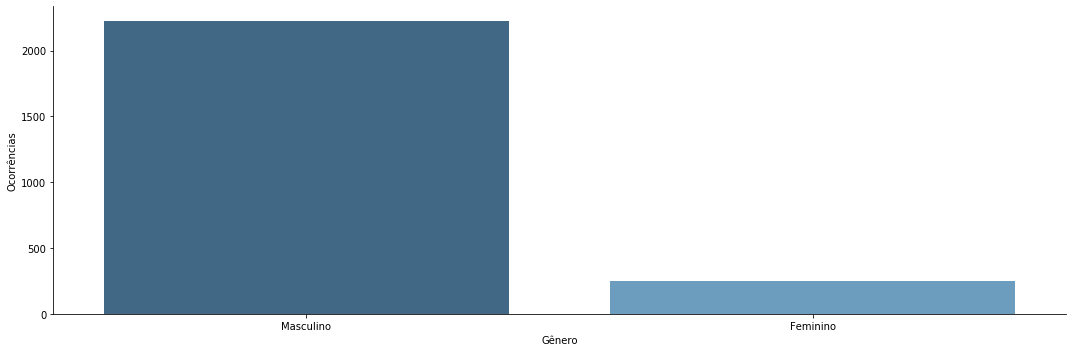

In [111]:
genero = dados['SEXO'].value_counts().to_frame().reset_index()
genero.columns = ["Gênero", "Ocorrências"]
sns.catplot(x = "Gênero", y = "Ocorrências", kind="bar", data = genero, palette="Blues_d", aspect=3)

## Soluções dos boletins de ocorrência

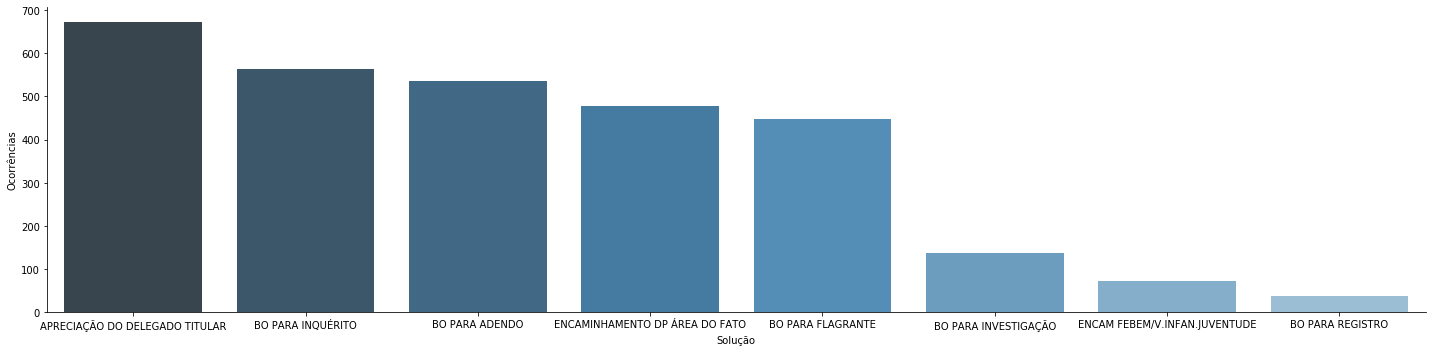

In [112]:
solucao = dados['SOLUCAO'].value_counts().to_frame().reset_index().head(8)
solucao.columns = ["Solução", "Ocorrências"]
sns.catplot(x = "Solução", y = "Ocorrências", kind="bar", data = solucao, palette="Blues_d", aspect=4)